# Segmentación utilizando aprendizaje de características (Feature Learning) 

En este notebook, se utilizará la segmentación semántica de imágenes del modelo [Deep Lab](https://github.com/tensorflow/models/tree/master/research/deeplab#deeplab-deep-labelling-for-semantic-image-segmentation), para segmentar objetos del dataset RPC. Específicamente, se validará con objetos de la super categoría drink de RPC, los cuales serán tratados como objetos de la clase bottle en el modelo Deep Lab.

## Contenido

#### 1. Importación de librerías y cargue del dataset RPC de test
#### 2. Definición modelo Deep Lab
#### 3. Validación Deep Lab con muestras del dataset

## 1. Importación de librerías y cargue del dataset RPC de test

Inicialmente, se importan las librerías que serán requeridas a lo largo del proceso.

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import tarfile
from six.moves import urllib
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np
from PIL import Image

%matplotlib inline

Se lee el archivo json que contiene información del dataset de test y se crea un dataframe con los datos.

In [2]:
data_df = pd.read_json('./data/instances_test2019.json', lines=True)
categories = data_df['categories'][0]
categories = df = pd.DataFrame.from_dict(categories, orient='columns')
annotations = data_df['annotations'][0]
annotations = df = pd.DataFrame.from_dict(annotations, orient='columns')
images = data_df['images'][0]
images = df = pd.DataFrame.from_dict(images, orient='columns')

annot_x_categ = pd.merge(annotations, categories, how='left', left_on=['category_id'], right_on=['id'])
annot_x_categ_file_names = pd.merge(annot_x_categ, images, how='left', left_on=['image_id'], right_on=['id'])

annot_x_categ_file_names

area                                bbox  category_id    id_x  \
0       149040.14   [896.74, 1032.48, 322.61, 461.98]          181       9   
1       261450.66    [451.22, 785.58, 478.44, 546.47]            8      10   
2        93244.76     [793.51, 732.3, 279.87, 333.18]           45      11   
3       415934.14    [566.95, 288.82, 656.82, 633.25]            8      12   
4       217678.17     [887.5, 713.08, 455.69, 477.69]          181      13   
5       115406.97    [593.66, 882.79, 322.13, 358.27]           45      14   
6       103733.48   [1153.52, 823.96, 308.59, 336.15]           45      15   
7       336601.69     [587.03, 410.67, 590.74, 569.8]            8      16   
8       190610.35    [536.54, 855.32, 477.93, 398.82]          181      17   
9        40634.78   [1059.06, 835.11, 107.65, 377.46]          130      18   
10      137357.16    [633.38, 727.41, 356.55, 385.24]           39      19   
11       81350.24    [491.8, 1139.02, 389.83, 208.68]          127      20   
12      204647.88     [547.56, 655.9, 450.65, 454.11]           39      21   
13       38377.94   [1317.48, 704.31, 103.73, 369.97]          130      22   
14      120238.93    [411.56, 995.91, 390.72, 307.74]          127      23   
15      119661.77    [222.01, 666.56, 268.94, 444.94]          181      24   
16       38303.86   [347.42, 1401.26, 236.69, 161.83]          144      25   
17       86788.40   [541.77, 1510.16, 386.42, 224.59]           59      26   
18      217916.37     [624.75, 791.99, 454.6, 479.35]          181      27   
19       39331.28    [946.95, 1149.5, 165.43, 237.75]          144      28   
20      108700.52   [618.74, 1298.66, 378.13, 287.47]           59      29   
21       39210.51    [953.72, 1156.26, 163.24, 240.2]          144      30   
22      114148.12    [727.18, 1323.99, 355.8, 320.82]           59      31   
23      231753.16   [168.64, 1182.65, 487.44, 475.45]          181      32   
24       87133.74    [924.32, 632.61, 292.58, 297.81]           46      33   
25      106360.00     [702.27, 730.63, 320.95, 331.4]          110      34   
26      274913.66    [809.75, 854.53, 544.86, 504.56]           21      35   
27      282185.75      [631.9, 630.0, 539.75, 522.81]           21      36   
28       91557.43     [1051.0, 923.36, 277.28, 330.2]          110      37   
29      121525.58   [731.38, 1126.56, 370.41, 328.08]           46      38   
...           ...                                 ...          ...     ...   
294303  166511.74   [429.16, 1201.48, 385.43, 432.02]          174  374358   
294304  130631.14    [53.76, 1263.62, 415.05, 314.73]           32  374359   
294305   84469.12    [685.2, 1434.76, 363.91, 232.12]          122  374360   
294306   93608.65   [1234.01, 913.48, 424.89, 220.31]          149  374361   
294307   85041.80  [1367.77, 1082.65, 389.48, 218.35]           34  374362   
294308  119100.31  [1090.41, 1249.85, 373.75, 318.67]           34  374363   
294309  285972.34  [1241.88, 1283.29, 546.85, 522.95]           43  374364   
294310  202154.54     [639.1, 868.15, 501.69, 402.95]           72  374365   
294311  197520.19    [761.74, 984.42, 492.14, 401.35]           72  374366   
294312  211420.72   [827.04, 1105.46, 495.32, 426.84]           72  374367   
294313  521825.14     [984.67, 23.46, 810.84, 643.56]           22  374368   
294314  673851.93        [436.03, 0.0, 906.1, 743.69]           22  374369   
294315  437042.54       [11.86, 200.6, 640.1, 682.77]           22  374370   
294316  238848.81     [55.19, 660.98, 566.84, 421.37]           42  374371   
294317  187359.95    [312.46, 817.38, 450.39, 415.99]           42  374372   
294318  253432.15     [559.69, 585.2, 517.04, 490.16]           42  374373   
294319  106109.65    [1039.49, 602.31, 377.8, 280.86]          174  374374   
294320  110148.22   [1394.65, 578.76, 385.96, 285.39]          174  374375   
294321   82941.15   [1183.62, 848.42, 418.52, 198.18]          149  374376   
294322  195639.32    [649.98, 889.1

Se contruye un dataset con imágenes de la super categoría drink, con el fin de utilizar el modelo Deep Lab para segmentar objetos de la clase bottle.

In [3]:
df_drink = annot_x_categ_file_names.query("supercategory == 'drink' and level == 'easy'")
X_data = np.array(df_drink['file_name'].values)

print X_data.shape
df_drink

(4214,)


area                                bbox  category_id   id_x  \
52      99925.39   [1020.04, 647.86, 179.12, 557.86]           72     61   
55     183157.45     [678.99, 617.32, 518.3, 353.38]           72     64   
59     200098.52    [714.85, 987.67, 487.71, 410.28]           72     68   
107     59407.23    [621.56, 790.86, 196.56, 302.23]           81    134   
108     75177.44    [923.95, 710.31, 243.88, 308.26]           81    135   
112     66686.33    [846.56, 875.92, 310.53, 214.75]           81    139   
115     62009.61    [329.31, 1228.78, 190.51, 325.5]           82    142   
118     84280.41   [856.62, 1075.14, 314.89, 267.65]           82    145   
122     65557.56     [209.84, 967.9, 205.18, 319.51]           82    149   
224     56417.02       [0.0, 1310.44, 313.3, 180.08]           82    281   
227     57356.72    [567.25, 1268.1, 177.01, 324.02]           82    284   
228     77417.38    [832.29, 744.58, 251.88, 307.36]           82    285   
231     78221.10    [526.73, 891.63, 252.34, 309.98]           82    288   
235     84708.45    [535.84, 892.09, 266.29, 318.11]           82    292   
239     68575.09     [464.82, 891.91, 332.73, 206.1]           82    296   
276     63113.71   [1008.75, 784.88, 184.23, 342.58]           87    351   
281     96125.32   [1009.72, 476.62, 285.13, 337.13]           87    356   
284     53173.32   [575.29, 1112.46, 329.57, 161.34]           87    359   
356    111706.35    [806.62, 429.03, 622.55, 179.43]           77    455   
358    177652.28     [677.39, 641.6, 300.34, 591.51]           77    457   
469    198493.34     [696.92, 966.9, 366.69, 541.31]           71    568   
470    133126.32   [508.87, 1052.86, 231.03, 576.23]           71    569   
473    175145.41     [615.67, 858.74, 535.78, 326.9]           71    572   
475    108397.22   [541.07, 1342.98, 558.84, 193.97]           71    574   
476    188804.00     [944.31, 592.43, 527.39, 358.0]           71    575   
478    146511.52     [437.88, 798.5, 267.19, 548.35]           71    577   
482    219576.87   [543.52, 1083.03, 448.14, 489.98]           71    581   
483    217937.24   [696.04, 1138.37, 453.53, 480.53]           71    582   
486    121982.31   [769.92, 1053.89, 211.45, 576.89]           71    585   
487    213368.48   [925.06, 1158.46, 429.79, 496.45]           71    586   
...          ...                                 ...          ...    ...   
56948  228130.70   [610.67, 1222.28, 556.31, 410.08]           76  71147   
56950  225114.96    [197.57, 1118.5, 553.57, 406.66]           76  71149   
56961  196970.45    [742.45, 951.45, 573.51, 343.45]           76  71160   
56962  227523.48    [560.36, 750.83, 428.49, 530.98]           76  71161   
56970  141200.70   [1232.15, 934.52, 231.82, 609.11]           76  71169   
56971  143394.12  [1063.02, 1003.12, 231.82, 618.57]           76  71170   
56977  251258.96    [919.21, 595.84, 551.26, 455.79]           75  71176   
56978  253364.43   [1008.52, 869.93, 555.88, 455.79]           75  71177   
56979  241380.75    [720.57, 699.01, 434.23, 555.88]           75  71178   
56987  250655.83    [900.52, 615.34, 539.27, 464.81]           75  71186   
56988  236655.72    [760.63, 658.37, 440.96, 536.69]           75  71187   
56989  156616.15    [215.23, 1018.1, 593.26, 263.99]           75  71188   
56996  181829.68    [918.13, 575.24, 296.02, 614.24]           75  71195   
56997  174466.50    [395.16, 538.24, 300.96, 579.71]           75  71196   
57004  157981.41   [216.82, 1039.44, 605.33, 260.98]           75  71203   
57129   58126.30    [954.91, 512.12, 193.53, 300.35]           81  71358   
57130   54871.23    [736.62, 563.22, 182.69, 300.35]           81  71359   
57131   80233.50    [693.27, 846.54, 277.13, 289.52]           81  71360   
57133  219515.97    [673.14, 934.79, 413.37, 531.04]           73  71362   
57134  211076.49   [1083.41, 862.02, 368.47, 572.84]           73  71363   
57150   83299.19    [663.85, 814.03, 280.23, 297.26]        

## 2. Definición modelo Deep Lab

A continuación vamos a definir el modelo de segmentación de imágenes Deep Lab, el cual se adaptó del notebook [colab deeplab demo](https://colab.sandbox.google.com/github/tensorflow/models/blob/master/research/deeplab/deeplab_demo.ipynb).

In [4]:
class DeepLabModel(object):
    """Class to load deeplab model and run inference."""
    
    INPUT_TENSOR_NAME = 'ImageTensor:0'
    OUTPUT_TENSOR_NAME = 'SemanticPredictions:0'
    INPUT_SIZE = 513
    FROZEN_GRAPH_NAME = 'frozen_inference_graph'
    
    def __init__(self, tarball_path):
        """Creates and loads pretrained deeplab model."""
        self.graph = tf.Graph()

        graph_def = None
        # Extract frozen graph from tar archive.
        tar_file = tarfile.open(tarball_path)
        for tar_info in tar_file.getmembers():
            if self.FROZEN_GRAPH_NAME in os.path.basename(tar_info.name):
                file_handle = tar_file.extractfile(tar_info)
                graph_def = tf.GraphDef.FromString(file_handle.read())
                break

        tar_file.close()

        if graph_def is None:
            raise RuntimeError('Cannot find inference graph in tar archive.')

        with self.graph.as_default():
            tf.import_graph_def(graph_def, name='')

        self.sess = tf.Session(graph=self.graph)
        
    def run(self, image):
        """Runs inference on a single image.

        Args:
          image: A PIL.Image object, raw input image.

        Returns:
          resized_image: RGB image resized from original input image.
          seg_map: Segmentation map of `resized_image`.
        """
        width, height = image.size
        resize_ratio = 1.0 * self.INPUT_SIZE / max(width, height)
        target_size = (int(resize_ratio * width), int(resize_ratio * height))
        resized_image = image.convert('RGB').resize(target_size, Image.ANTIALIAS)
        batch_seg_map = self.sess.run(
            self.OUTPUT_TENSOR_NAME,
            feed_dict={self.INPUT_TENSOR_NAME: [np.asarray(resized_image)]})
        seg_map = batch_seg_map[0]
        return resized_image, seg_map
    
def create_pascal_label_colormap():
    """Creates a label colormap used in PASCAL VOC segmentation benchmark.

    Returns:
    A Colormap for visualizing segmentation results.
    """
    colormap = np.zeros((256, 3), dtype=int)
    ind = np.arange(256, dtype=int)

    for shift in reversed(range(8)):
        for channel in range(3):
            colormap[:, channel] |= ((ind >> channel) & 1) << shift
        ind >>= 3

    return colormap
    
def label_to_color_image(label):    
    """Adds color defined by the dataset colormap to the label.


    Args:
        label: A 2D array with integer type, storing the segmentation label.

    Returns:
        result: A 2D array with floating type. The element of the array
          is the color indexed by the corresponding element in the input label
          to the PASCAL color map.

    Raises:
       ValueError: If label is not of rank 2 or its value is larger than color
         map maximum entry.
      """
    if label.ndim != 2:
        raise ValueError('Expect 2-D input label')

    colormap = create_pascal_label_colormap()

    if np.max(label) >= len(colormap):
        raise ValueError('label value too large.')

    return colormap[label]

def vis_segmentation(image, seg_map):
    """Visualizes input image, segmentation map and overlay view."""
    plt.figure(figsize=(15, 5))
    grid_spec = gridspec.GridSpec(1, 4, width_ratios=[6, 6, 6, 1])

    plt.subplot(grid_spec[0])
    plt.imshow(image)
    plt.axis('off')
    plt.title('input image')

    plt.subplot(grid_spec[1])
    seg_image = label_to_color_image(seg_map).astype(np.uint8)
    plt.imshow(seg_image)
    plt.axis('off')
    plt.title('segmentation map')

    plt.subplot(grid_spec[2])
    plt.imshow(image)
    plt.imshow(seg_image, alpha=0.7)
    plt.axis('off')
    plt.title('segmentation overlay')

    unique_labels = np.unique(seg_map)
    ax = plt.subplot(grid_spec[3])
    plt.imshow(
      FULL_COLOR_MAP[unique_labels].astype(np.uint8), interpolation='nearest')
    ax.yaxis.tick_right()
    plt.yticks(range(len(unique_labels)), LABEL_NAMES[unique_labels])
    plt.xticks([], [])
    ax.tick_params(width=0.0)
    plt.grid('off')
    plt.show()


LABEL_NAMES = np.asarray([
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
])

FULL_LABEL_MAP = np.arange(len(LABEL_NAMES)).reshape(len(LABEL_NAMES), 1)
FULL_COLOR_MAP = label_to_color_image(FULL_LABEL_MAP)

Se define el modelo pre-entrenado para ser utilizado por el modelo Deep Lab. En este caso se selecciona mobilenetv2_coco_voctrainaug.

In [5]:
MODEL_NAME = 'mobilenetv2_coco_voctrainaug'  # @param ['mobilenetv2_coco_voctrainaug', 'mobilenetv2_coco_voctrainval', 'xception_coco_voctrainaug', 'xception_coco_voctrainval']

_DOWNLOAD_URL_PREFIX = 'http://download.tensorflow.org/models/'
_MODEL_URLS = {
    'mobilenetv2_coco_voctrainaug':
        'deeplabv3_mnv2_pascal_train_aug_2018_01_29.tar.gz',
    'mobilenetv2_coco_voctrainval':
        'deeplabv3_mnv2_pascal_trainval_2018_01_29.tar.gz',
    'xception_coco_voctrainaug':
        'deeplabv3_pascal_train_aug_2018_01_04.tar.gz',
    'xception_coco_voctrainval':
        'deeplabv3_pascal_trainval_2018_01_04.tar.gz',
}
_TARBALL_NAME = 'deeplab_model.tar.gz'

model_dir = './models/'
tf.gfile.MakeDirs(model_dir)
download_path = os.path.join(model_dir, _TARBALL_NAME)

Descargamos el modelo pre-entrenado.

In [6]:
print('downloading model, this might take a while...')
urllib.request.urlretrieve(_DOWNLOAD_URL_PREFIX + _MODEL_URLS[MODEL_NAME], download_path)
print('download completed! loading DeepLab model...')

downloading model, this might take a while...
download completed! loading DeepLab model...


Instanciamos el modelo Deep Lab con el modelo pre-entrenado.

In [7]:
MODEL = DeepLabModel(download_path)
print('model loaded successfully!')

model loaded successfully!


Se define la función run_visualization para mostrar el resultado de la segmentación de objetos.

In [8]:
def run_visualization(url):
    """Inferences DeepLab model and visualizes result."""
    try:
        original_im = Image.open(url)
    except IOError:
        print('Cannot retrieve image. Please check url: ' + url)
        return

    print('running deeplab on image %s...' % url)
    resized_im, seg_map = MODEL.run(original_im)

    vis_segmentation(resized_im, seg_map)
    return seg_map

## 3. Validación Deep Lab con muestras del dataset

A continuación, se realizan varias pruebas utilizando muestras de la super categoría drink del dataset RPC de test, para ser segmentadas como clases bottle del modelo Deep Lab.

$\textbf{Prueba 1:}$ Utilizando una imagen donde aparecen varios objetos de la super categoría drink con otros objetos.

running deeplab on image ./data/test2019/20181019-16-19-10-2782.jpg...


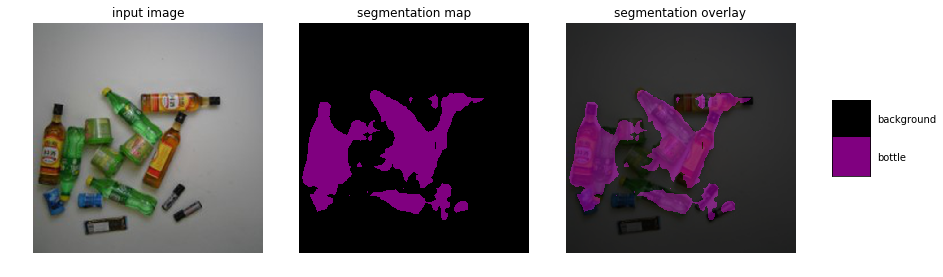

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [9]:
image_url = "./data/test2019/20181019-16-19-10-2782.jpg"
run_visualization(image_url)

En este caso se observa que los objetos de la clase bottle son segmentados.

$\textbf{Prueba 2:}$ Utilizando una imagen donde aparecen objetos de la super categoría drink pero que no son botellas.

running deeplab on image ./data/test2019/20180829-13-28-16-1719.jpg...


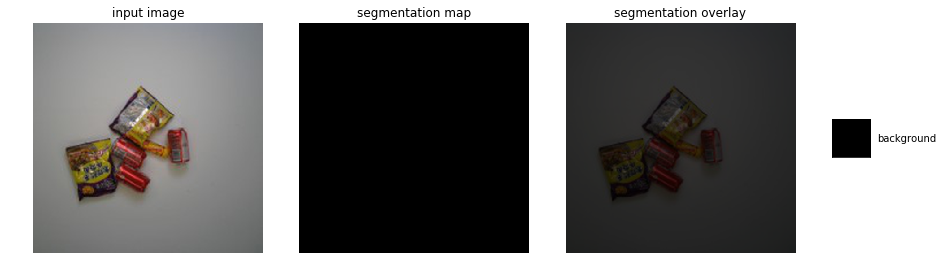

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [10]:
image_url = "./data/test2019/20180829-13-28-16-1719.jpg"
run_visualization(image_url)

En este caso vemos que no se encontró ningún objeto de la clase bottle para ser segmentado.

$\textbf{Prueba 3:}$ Generando una imagen aleatoria de la super categoría drink.

running deeplab on image ./data/test2019/20180903-09-34-35-2939.jpg...


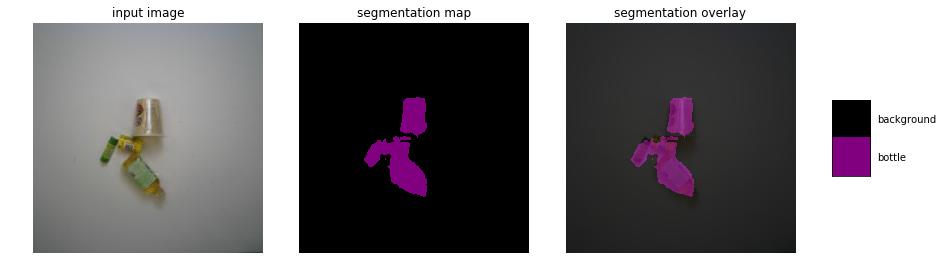

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [11]:
index = np.random.randint(0,len(X_data),1)
filename = X_data[index[0]].encode('utf-8')
image_url = "./data/test2019/"+filename
run_visualization(image_url)

En la imagen aleatoria, también se observa la segmentación de objetos de la clase bottle.

$\textbf{Prueba 4:}$ Generando un listado de imágenes aleatorias de la super categoría drink.

In [23]:
num_imgs = 30
index = np.random.randint(0,len(X_data), num_imgs)
imgs_test = X_data[index].astype(str)
imgs_test

array(['20180830-10-57-29-1507.jpg', '20180830-16-43-44-2047.jpg',
       '20180830-10-53-40-1505.jpg', '20180830-09-15-02-1840.jpg',
       '20180831-16-14-44-2458.jpg', '20180828-15-09-26-942.jpg',
       '20180829-11-55-04-1300.jpg', '20180903-14-59-18-2647.jpg',
       '20180829-11-05-32-1670.jpg', '20180830-13-58-13-1558.jpg',
       '20180903-15-35-24-2665.jpg', '20180904-10-44-29-2777.jpg',
       '20180824-16-56-00-520.jpg', '20180903-15-34-09-2664.jpg',
       '20180829-13-41-55-1333.jpg', '20180903-14-18-06-3022.jpg',
       '20180831-11-30-29-2152.jpg', '20180828-14-07-33-894.jpg',
       '20180828-10-48-29-808.jpg', '20180824-14-15-56-418.jpg',
       '20180828-10-32-08-1058.jpg', '20180829-14-05-46-1749.jpg',
       '20180828-13-03-58-852.jpg', '20180903-10-04-10-2530.jpg',
       '20180828-10-05-16-1035.jpg', '20180831-15-46-27-2847.jpg',
       '20180828-13-47-11-883.jpg', '20180824-15-36-54-52.jpg',
       '20180903-13-44-12-3003.jpg', '20180829-10-17-16-1635.jpg'],
   

Se ejecuta la función que muestra la segmentación para el listado de imágenes.

running deeplab on image ./data/test2019/20180830-10-57-29-1507.jpg...


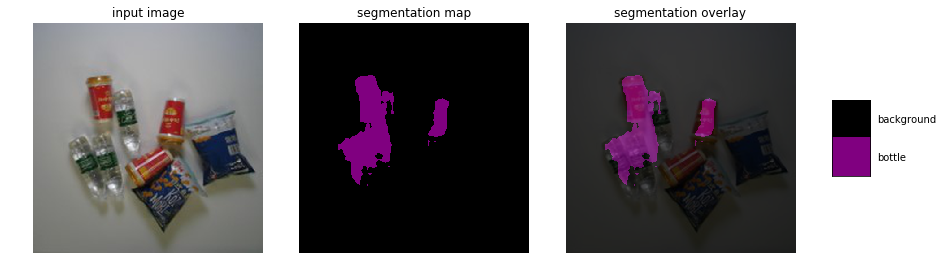

running deeplab on image ./data/test2019/20180830-16-43-44-2047.jpg...


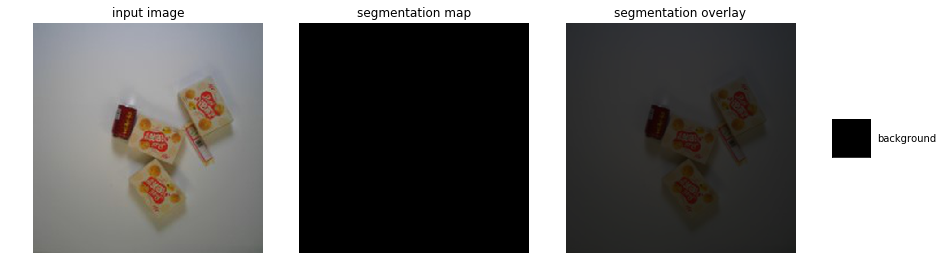

running deeplab on image ./data/test2019/20180830-10-53-40-1505.jpg...


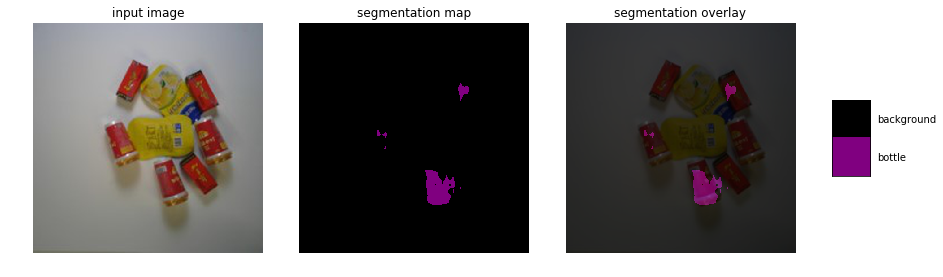

running deeplab on image ./data/test2019/20180830-09-15-02-1840.jpg...


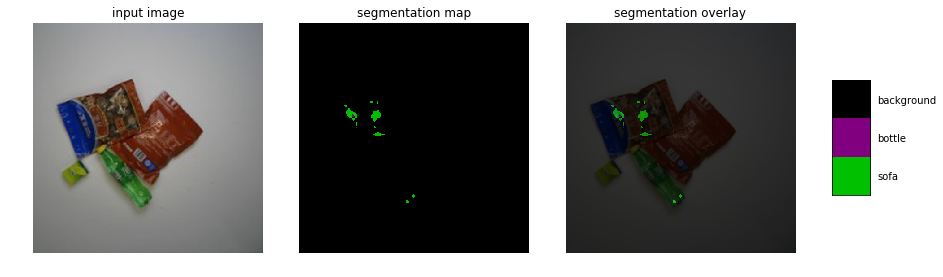

running deeplab on image ./data/test2019/20180831-16-14-44-2458.jpg...


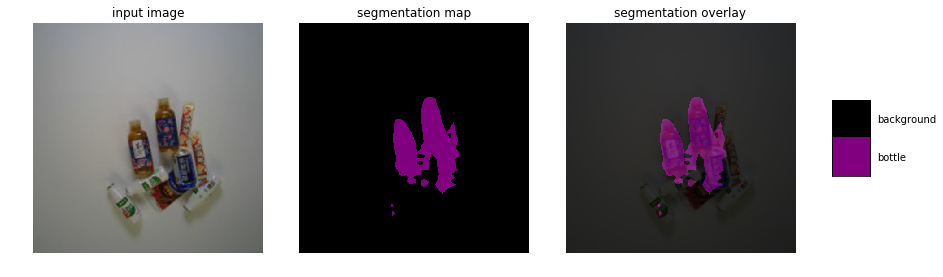

running deeplab on image ./data/test2019/20180828-15-09-26-942.jpg...


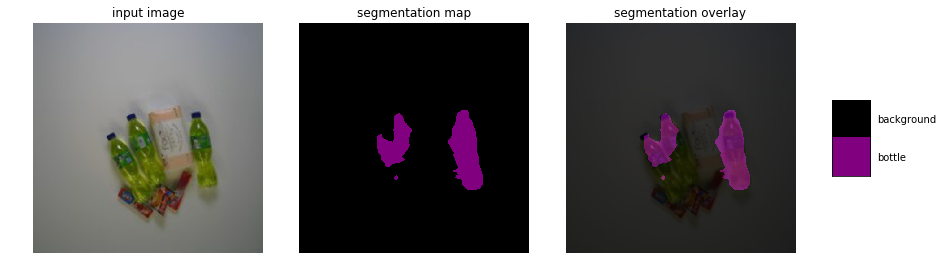

running deeplab on image ./data/test2019/20180829-11-55-04-1300.jpg...


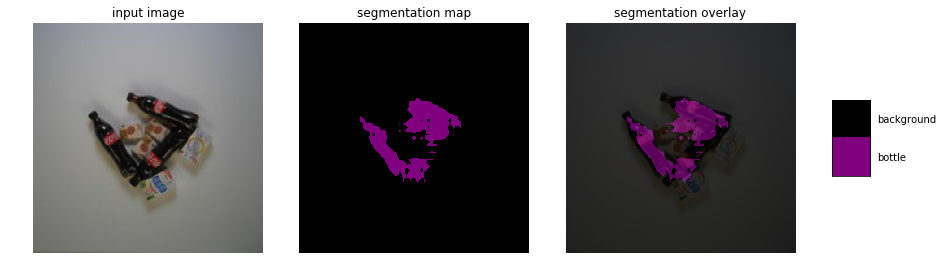

running deeplab on image ./data/test2019/20180903-14-59-18-2647.jpg...


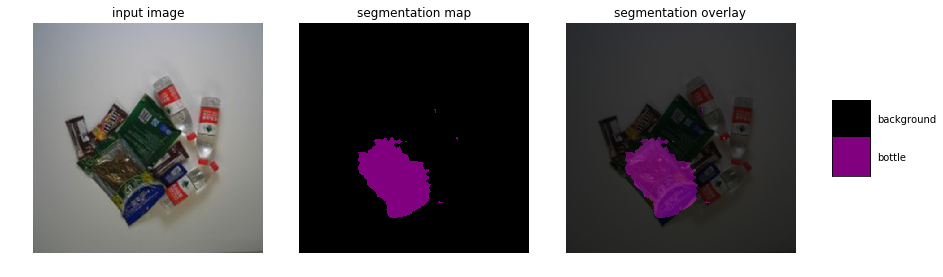

running deeplab on image ./data/test2019/20180829-11-05-32-1670.jpg...


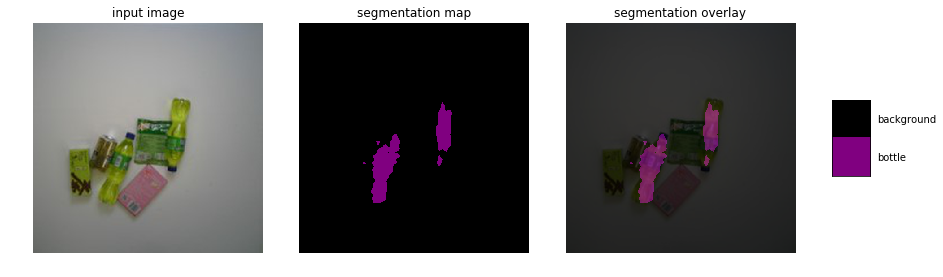

running deeplab on image ./data/test2019/20180830-13-58-13-1558.jpg...


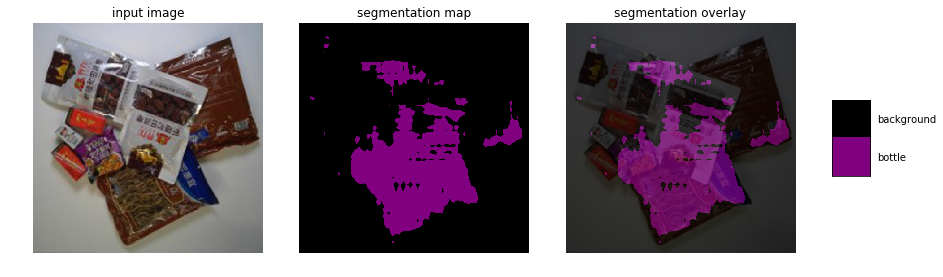

running deeplab on image ./data/test2019/20180903-15-35-24-2665.jpg...


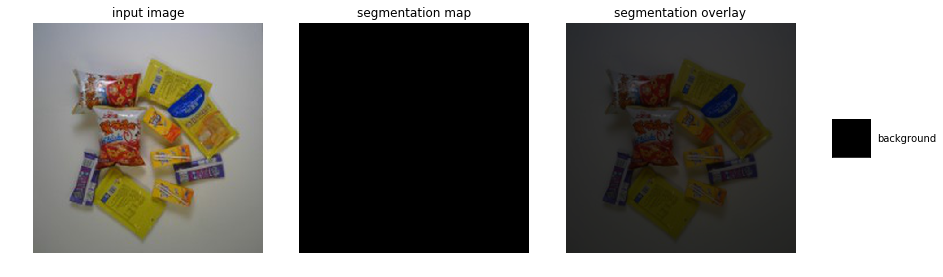

running deeplab on image ./data/test2019/20180904-10-44-29-2777.jpg...


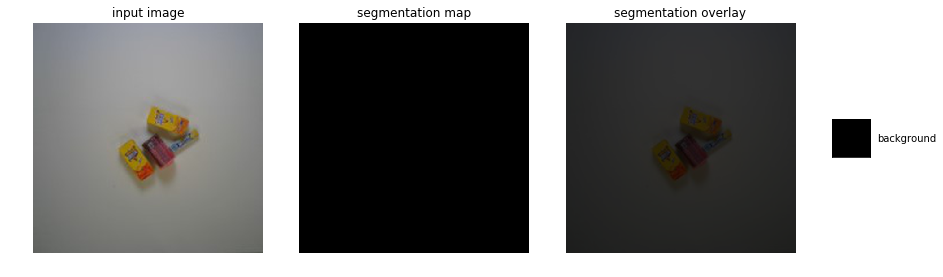

running deeplab on image ./data/test2019/20180824-16-56-00-520.jpg...


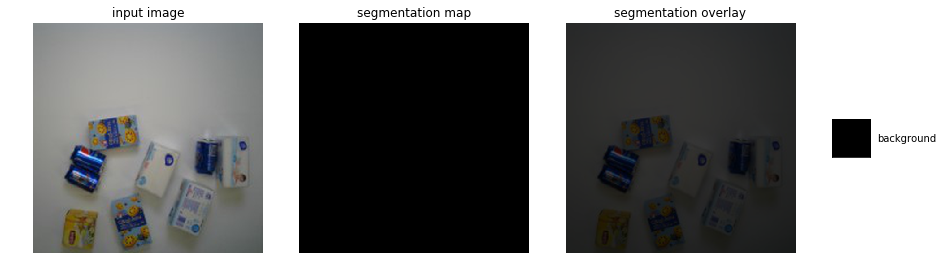

running deeplab on image ./data/test2019/20180903-15-34-09-2664.jpg...


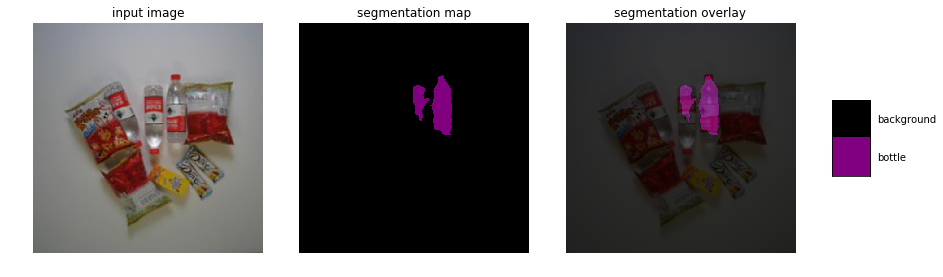

running deeplab on image ./data/test2019/20180829-13-41-55-1333.jpg...


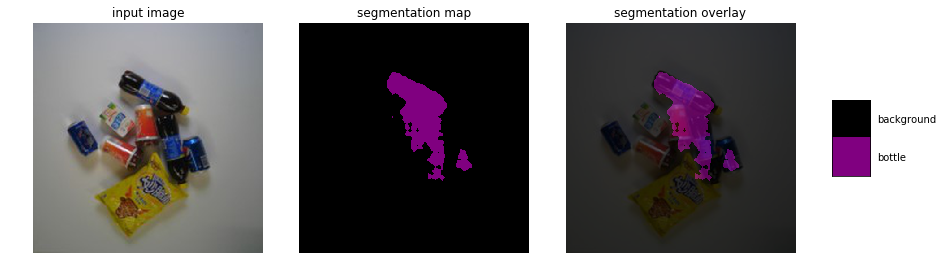

running deeplab on image ./data/test2019/20180903-14-18-06-3022.jpg...


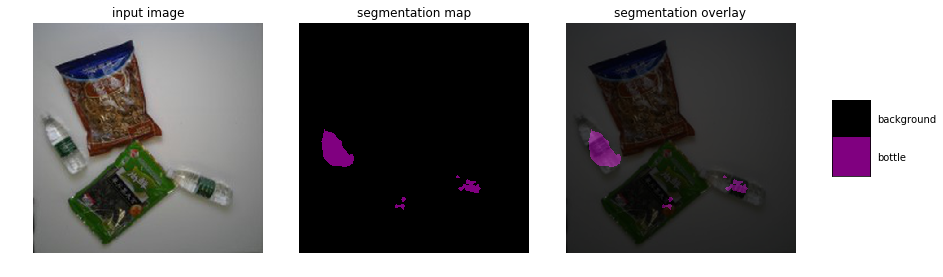

running deeplab on image ./data/test2019/20180831-11-30-29-2152.jpg...


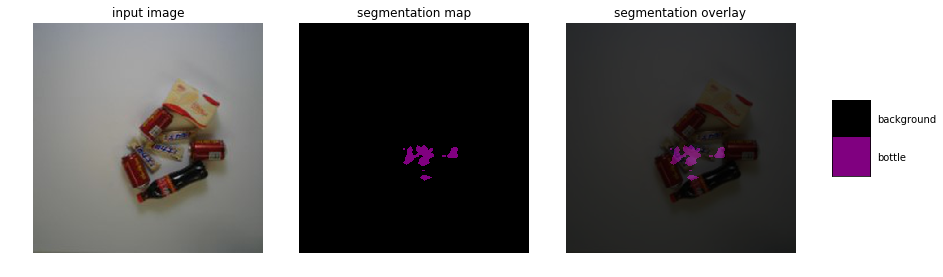

running deeplab on image ./data/test2019/20180828-14-07-33-894.jpg...


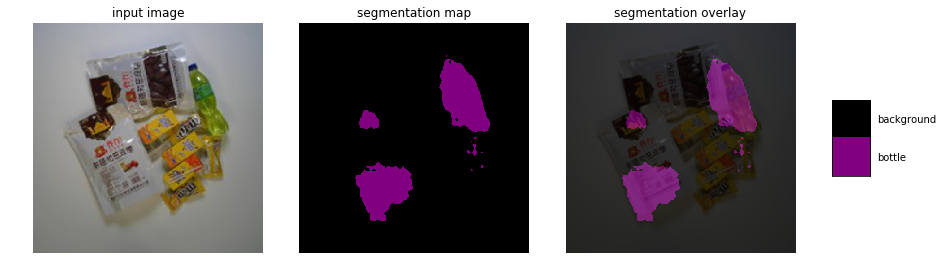

running deeplab on image ./data/test2019/20180828-10-48-29-808.jpg...


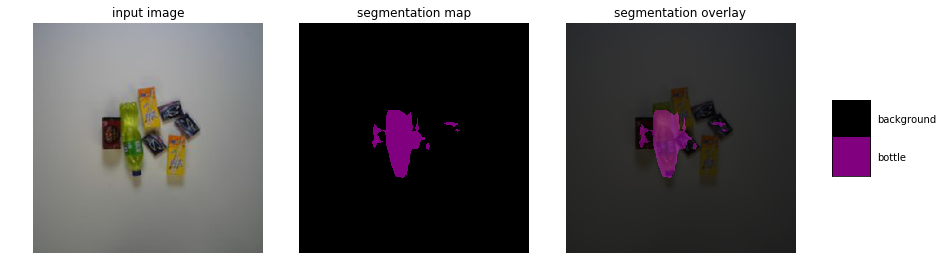

running deeplab on image ./data/test2019/20180824-14-15-56-418.jpg...


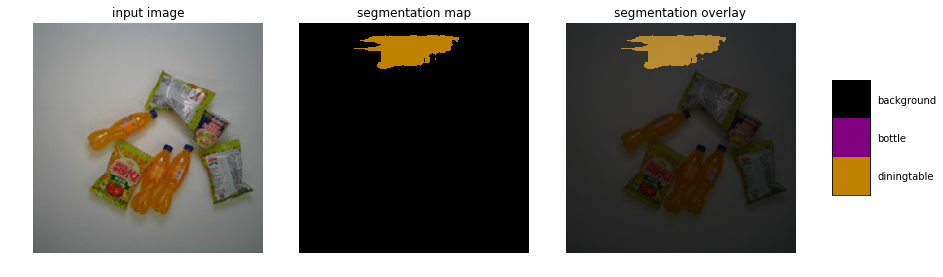

running deeplab on image ./data/test2019/20180828-10-32-08-1058.jpg...


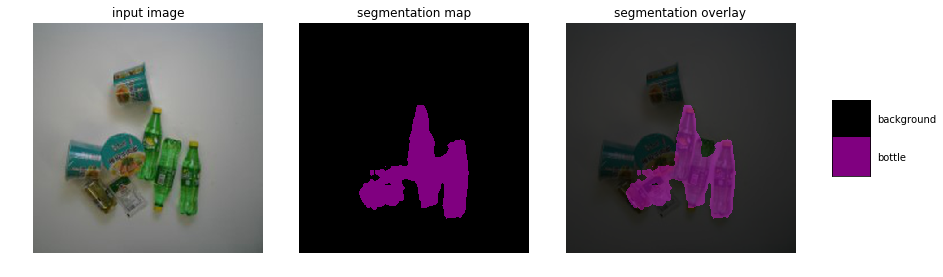

running deeplab on image ./data/test2019/20180829-14-05-46-1749.jpg...


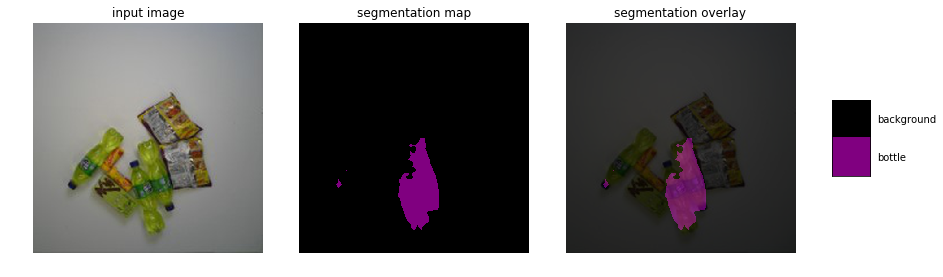

running deeplab on image ./data/test2019/20180828-13-03-58-852.jpg...


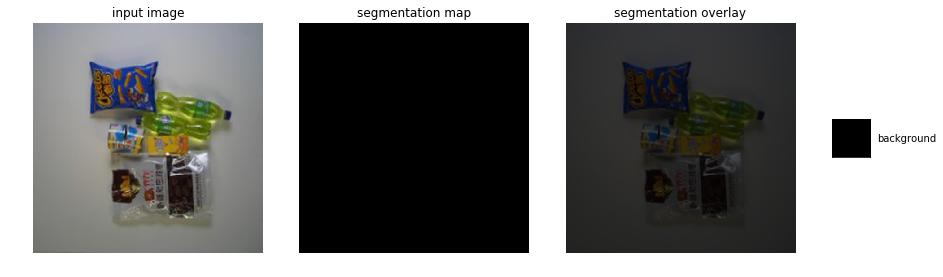

running deeplab on image ./data/test2019/20180903-10-04-10-2530.jpg...


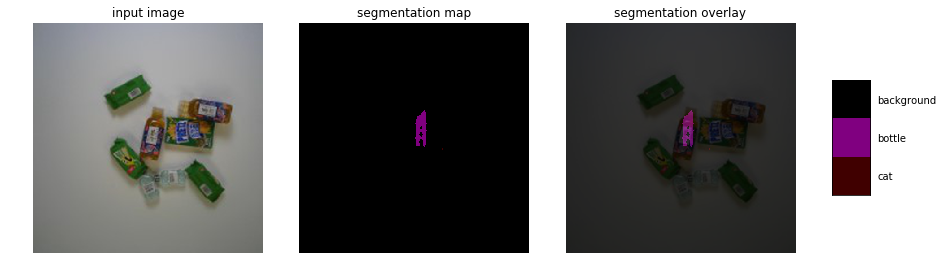

running deeplab on image ./data/test2019/20180828-10-05-16-1035.jpg...


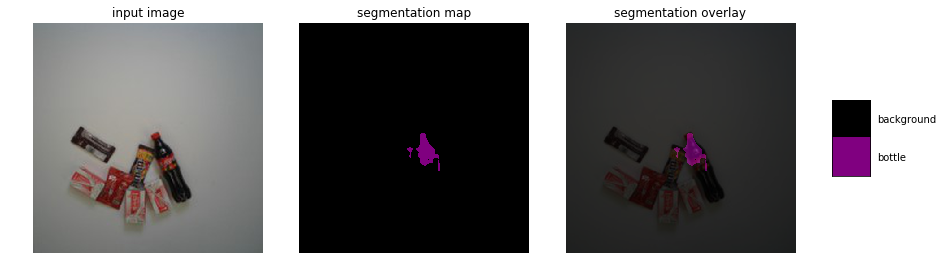

running deeplab on image ./data/test2019/20180831-15-46-27-2847.jpg...


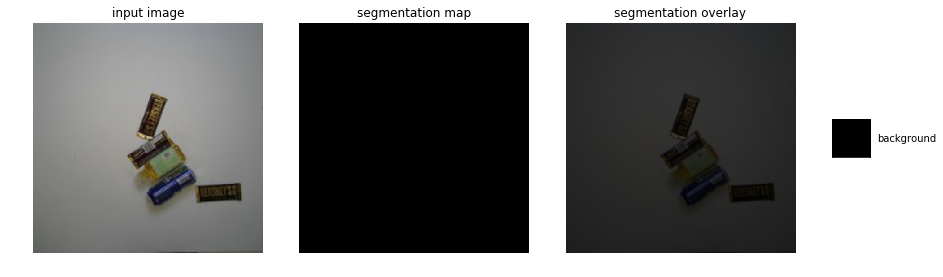

running deeplab on image ./data/test2019/20180828-13-47-11-883.jpg...


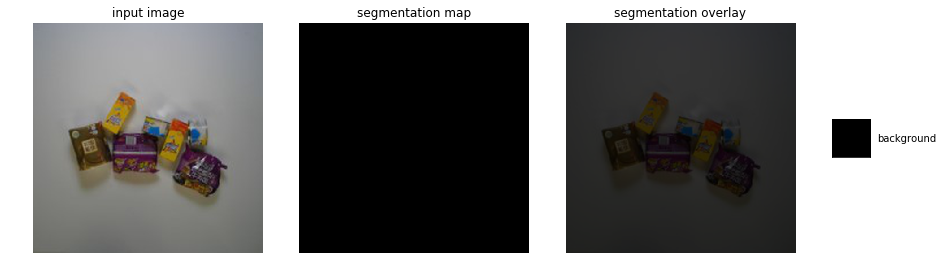

running deeplab on image ./data/test2019/20180824-15-36-54-52.jpg...


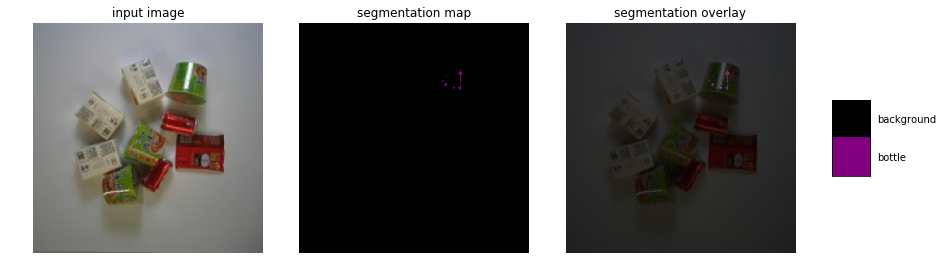

running deeplab on image ./data/test2019/20180903-13-44-12-3003.jpg...


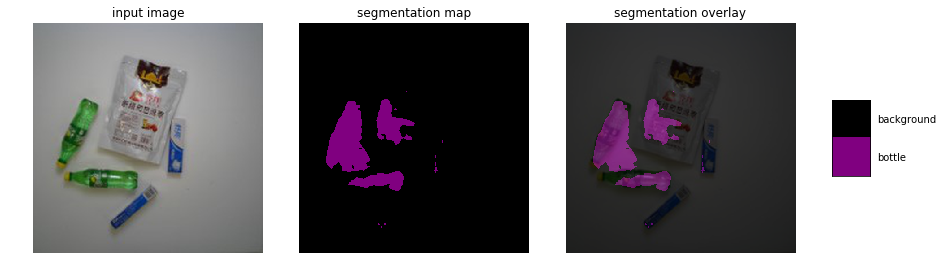

running deeplab on image ./data/test2019/20180829-10-17-16-1635.jpg...


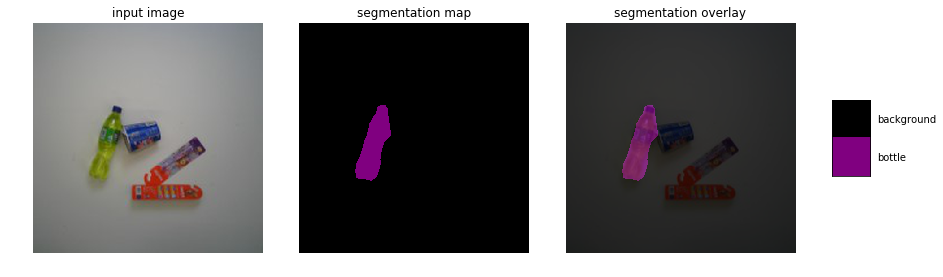

In [24]:
imgs_labels_sec = []
for i in range(imgs_test.shape[0]):
    seg_map = run_visualization("./data/test2019/"+imgs_test[i])    
    unique_labels = np.unique(seg_map)
    imgs_labels_sec.append(unique_labels)

Se observa como en la mayoría de los casos se detecta la clase bottle.

In [25]:
label_bottle = 5
count_preds_sec = 0
for i in range(len(imgs_labels_sec)):
    if label_bottle in imgs_labels_sec[i]:
        count_preds_sec += 1
accuracy = float(count_preds_sec) / float(len(imgs_labels_sec))
print 'Accuracy = ', accuracy*100, '%'

Accuracy =  76.6666666667 %


Finalmente, calculamos un porcentaje de precisión de acuerdo al número de imágenes por el número de veces que se segmentó la clase bottle.